In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines= False)
# chicago_df_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines= False)
# chicago_df_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines= False)
# chicago_df_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines= False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
chicago_df_1.shape

(1923515, 23)

In [4]:
# chicago_df_2.shape

In [5]:
# chicago_df_3.shape

In [6]:
# chicago_df_4.shape

In [7]:
# chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3, chicago_df_4 ])

In [8]:
# chicago_df.shape

In [9]:
chicago_df_1.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1.82938e+06,2001.0,08/29/2006 03:46:28 AM,41.687,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1.84483e+06,2003.0,04/15/2016 08:55:02 AM,41.7297,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1.89576e+06,2003.0,04/15/2016 08:55:02 AM,41.8698,-87.708180,"(41.869772159, -87.708180162)"


In [10]:
chicago_df_1.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1923505,6250570,4777883,HM391095,11/11/2002 12:00:00 AM,070XX S TALMAN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,18.0,66.0,06,NaN,NaN,2002.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1923506,6250651,4668393,HM270006,02/01/2003 09:00:00 AM,054XX W NORTH AVE,1120,DECEPTIVE PRACTICE,FORGERY,OTHER,False,...,37.0,25.0,10,1139595.0,1.9101e+06,2003.0,04/15/2016 08:55:02 AM,41.9094,-87.762628,"(41.909413615, -87.762628301)"
1923507,6252118,4670514,HM268786,06/15/2003 09:00:00 PM,027XX W 63RD ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,ALLEY,False,...,15.0,66.0,02,1159376.0,1.86277e+06,2003.0,04/15/2016 08:55:02 AM,41.7791,-87.691261,"(41.779147989, -87.691261104)"
1923508,6252207,4780420,HM390762,09/01/2004 12:01:00 AM,071XX S SEELEY AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,17.0,67.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1923509,6252428,4780874,HM395036,07/01/2004 12:00:00 AM,020XX E 70TH ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,5.0,43.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1923510,6252586,4781176,HM386461,04/01/2001 09:00:00 AM,023XX N LATROBE AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,...,37.0,19.0,06,1140960.0,1.91506e+06,2001.0,06/14/2006 04:14:16 AM,41.923,-87.757492,"(41.922996623, -87.757491503)"
1923511,6252606,4671197,HM270817,09/01/2003 12:01:00 AM,045XX N MOBILE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,38.0,15.0,06,1133528.0,1.92963e+06,2003.0,04/15/2016 08:55:02 AM,41.9631,-87.784457,"(41.963133955, -87.784456675)"
1923512,6252728,4671380,HM269330,08/01/2002 09:00:00 AM,020XX W 82ND PL,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,18.0,71.0,06,1164056.0,1.84994e+06,2002.0,04/15/2016 08:55:02 AM,41.7439,-87.674464,"(41.743865444, -87.674463733)"
1923513,6253372,4782588,HM394550,06/04/2001 12:01:00 AM,087XX S MUSKEGON AVE,0610,BURGLARY,FORCIBLE ENTRY,OTHER,False,...,10.0,46.0,05,1196570.0,1.84747e+06,2001.0,07/05/2006 04:01:36 AM,41.7363,-87.555413,"(41.736342659, -87.555413094)"
1923514,6254041,4673324,HM274913,08/09/2002 03:00:00 PM,067XX S CHAMPLAIN AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,20.0,42.0,06,1181728.0,1.86049e+06,2002.0,04/15/2016 08:55:02 AM,41.7724,-87.609387,"(41.772420712, -87.609387104)"


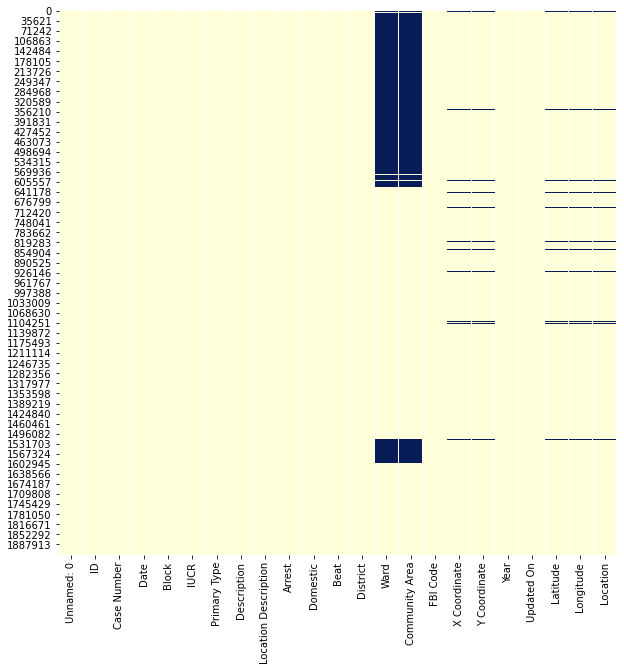

In [11]:
plt.figure(figsize = (10, 10))
sns.heatmap(chicago_df_1.isnull(), cbar = False, cmap = 'YlGnBu')

In [13]:
chicago_df_1.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1 )

In [14]:
chicago_df_1

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
1923510,04/01/2001 09:00:00 AM,023XX N LATROBE AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,ALLEY,False,False
1923511,09/01/2003 12:01:00 AM,045XX N MOBILE AVE,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False
1923512,08/01/2002 09:00:00 AM,020XX W 82ND PL,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1923513,06/04/2001 12:01:00 AM,087XX S MUSKEGON AVE,BURGLARY,FORCIBLE ENTRY,OTHER,False,False


In [17]:
# chicago_df.Date = pd.to_datetime(chicago_df_1.Date, format = '%m%d%Y %H:%M:%S %p')

In [27]:
chicago_df_1.index = pd.DatetimeIndex(chicago_df_1.Date)

In [28]:
 chicago_df_1['Primary Type'].value_counts()

THEFT                               395395
BATTERY                             363538
CRIMINAL DAMAGE                     220298
NARCOTICS                           210600
OTHER OFFENSE                       123753
ASSAULT                             121417
BURGLARY                            101902
MOTOR VEHICLE THEFT                  98924
ROBBERY                              70986
CRIMINAL TRESPASS                    57770
DECEPTIVE PRACTICE                   55751
PROSTITUTION                         25666
WEAPONS VIOLATION                    17094
OFFENSE INVOLVING CHILDREN           11181
PUBLIC PEACE VIOLATION               10145
SEX OFFENSE                           8535
CRIM SEXUAL ASSAULT                   7079
LIQUOR LAW VIOLATION                  5384
GAMBLING                              4051
ARSON                                 3828
HOMICIDE                              3172
KIDNAPPING                            3022
INTERFERENCE WITH PUBLIC OFFICER      1701
INTIMIDATIO

In [29]:
chicago_df_1['Primary Type'].value_counts().iloc[:15]

THEFT                         395395
BATTERY                       363538
CRIMINAL DAMAGE               220298
NARCOTICS                     210600
OTHER OFFENSE                 123753
ASSAULT                       121417
BURGLARY                      101902
MOTOR VEHICLE THEFT            98924
ROBBERY                        70986
CRIMINAL TRESPASS              57770
DECEPTIVE PRACTICE             55751
PROSTITUTION                   25666
WEAPONS VIOLATION              17094
OFFENSE INVOLVING CHILDREN     11181
PUBLIC PEACE VIOLATION         10145
Name: Primary Type, dtype: int64

In [30]:
order_data = chicago_df_1['Primary Type'].value_counts().iloc[:15].index

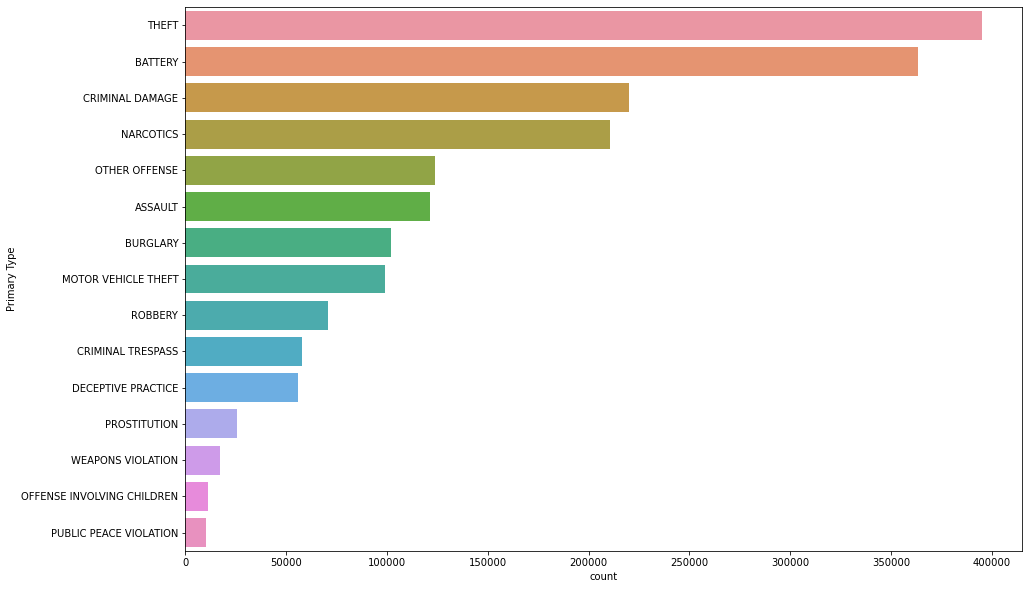

In [31]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = chicago_df_1, order = order_data)

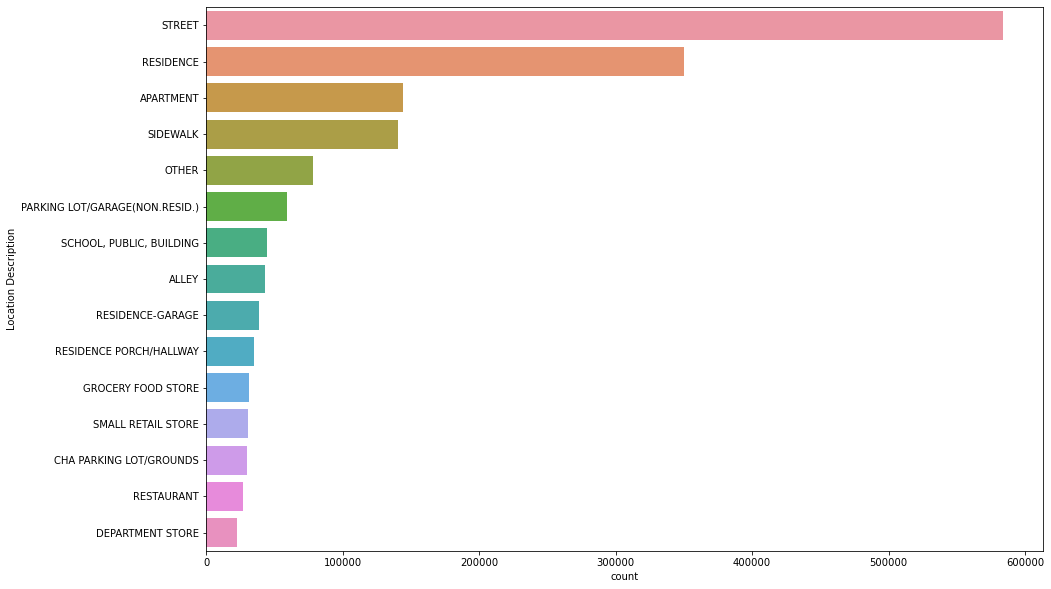

In [33]:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Location Description', data = chicago_df_1, order = chicago_df_1['Location Description'].value_counts().iloc[:15].index)

In [32]:
chicago_df_1.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

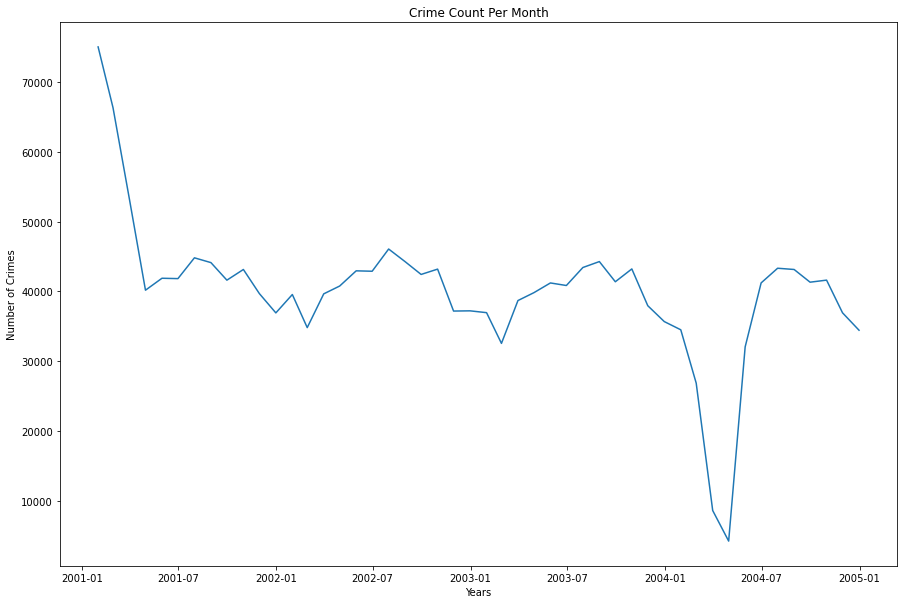

In [36]:
plt.figure(figsize = (15, 10))
plt.plot(chicago_df_1.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [37]:
# Preparing the data

chicago_prophet = chicago_df_1.resample('M').size().reset_index()

In [38]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
5,2001-06-30,41823
6,2001-07-31,44801
7,2001-08-31,44115
8,2001-09-30,41602
9,2001-10-31,43131


In [39]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [40]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
5,2001-06-30,41823
6,2001-07-31,44801
7,2001-08-31,44115
8,2001-09-30,41602
9,2001-10-31,43131


In [41]:
chicago_prophet_df_final = chicago_prophet.rename(columns= {'Date' : 'ds', 'Crime Count' : 'y'})

In [42]:
# making predictions

m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
future = m.make_future_dataframe(periods = 730)
forecast = m.predict(future)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,45285.241798,54673.015408,70426.309593,45285.241798,45285.241798,17656.519592,17656.519592,17656.519592,17656.519592,17656.519592,17656.519592,0.0,0.0,0.0,62941.761389
1,2001-02-28,44985.716613,38585.232823,55442.551618,44985.716613,44985.716613,2267.915019,2267.915019,2267.915019,2267.915019,2267.915019,2267.915019,0.0,0.0,0.0,47253.631632
2,2001-03-31,44654.099444,30345.474743,47043.853297,44654.099444,44654.099444,-6108.224125,-6108.224125,-6108.224125,-6108.224125,-6108.224125,-6108.224125,0.0,0.0,0.0,38545.875319
3,2001-04-30,44333.179603,25915.487178,42136.825552,44333.179603,44333.179603,-10416.244882,-10416.244882,-10416.244882,-10416.244882,-10416.244882,-10416.244882,0.0,0.0,0.0,33916.934721
4,2001-05-31,44001.562434,37565.535405,55117.193814,44001.562434,44001.562434,2263.868395,2263.868395,2263.868395,2263.868395,2263.868395,2263.868395,0.0,0.0,0.0,46265.430829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2006-12-27,22227.509220,25973.461803,42423.139447,22227.091292,22227.952612,12079.776307,12079.776307,12079.776307,12079.776307,12079.776307,12079.776307,0.0,0.0,0.0,34307.285526
774,2006-12-28,22216.816123,27138.365183,44242.587668,22216.397196,22217.260543,13315.677826,13315.677826,13315.677826,13315.677826,13315.677826,13315.677826,0.0,0.0,0.0,35532.493948
775,2006-12-29,22206.123026,26515.628433,42869.129950,22205.703099,22206.568475,12021.778789,12021.778789,12021.778789,12021.778789,12021.778789,12021.778789,0.0,0.0,0.0,34227.901815
776,2006-12-30,22195.429929,22279.568284,38838.580527,22195.009003,22195.876314,8056.228015,8056.228015,8056.228015,8056.228015,8056.228015,8056.228015,0.0,0.0,0.0,30251.657944


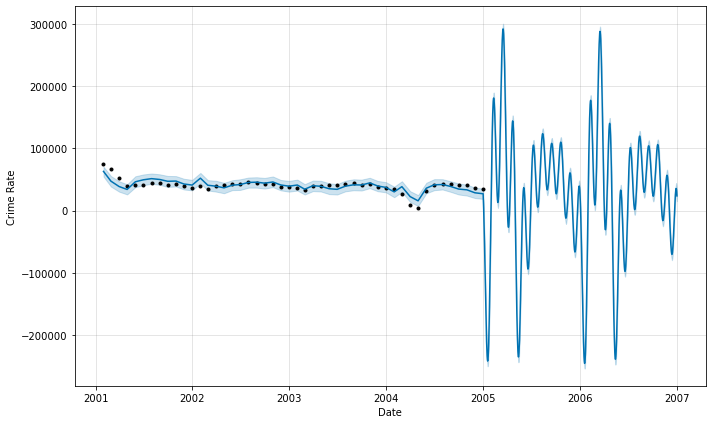

In [49]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

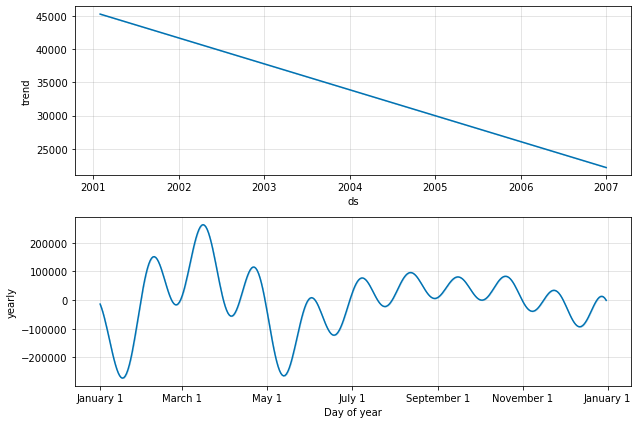

In [50]:
figure = m.plot_components(forecast)